In [1]:
import pandas as pd
import numpy as np

pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 100)

In [2]:
mapp = pd.read_csv('../data/gene_names_mapping_new.tsv', sep='\t')
mapp = mapp.set_index('ensembl', drop=False)

pheno = pd.read_csv('../data/pheno_final.tsv', sep='\t')
pheno = pheno.drop_duplicates('subject')
pheno = pheno.set_index('subject', drop=False)

de   = pd.read_csv('../differential_expression_analysis3/output/no_sex/intersect.tsv', sep='\t')
de = de.set_index('ensembl', drop=False)

keep = pd.read_csv('../differential_expression_analysis3/output/no_sex/keep.intersect.txt', header=None)

pmapp = mapp[mapp.biotype == 'protein_coding'].copy()

keep = keep[keep[0].isin(pmapp.ensembl)].copy()
keep = pmapp.loc[keep[0], 'Description'].to_list()

de = de[de['ensembl'].isin(pmapp.ensembl)].copy().gene.to_list()

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:3058: DtypeWarning: Columns (5) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
# load in network
net = pd.read_csv('all_gene_network.tsv', sep='\t')
net.columns = ['startg', 'endg', 'distance',
       'num_connector_genes', 'connectors']
net = net.set_index(['startg', 'endg'], drop=False)
net = net.rename_axis((None, None))

# we don't want connections where startg == endg
net = net[net.startg != net.endg].copy()

In [4]:
# keep subnet that is in de genes

subnet = net[net.endg.isin(de)]
subnet = subnet[subnet.startg.isin(de)]
subnet = subnet[subnet.startg != subnet.endg]
subnet = subnet[subnet.num_connector_genes != 0]

In [6]:
def flatten_connectors(connectors):
    new = []
    for s in connectors:
        l = s.split(',')
        for item in l:
            new.append(item)
            
    new = list(set(new))
    return new

In [7]:
# get connectors

connectors = subnet.connectors.to_list()
connectors = flatten_connectors(connectors)

connectors = list(set(connectors))

In [8]:
# write to file

with open('output/de_connectors_no_sex.txt', 'w') as f:
    for s in connectors:
        f.write(s)
        f.write('\n')

In [9]:
len(connectors)

5008

In [10]:
# check overlap with previous connectors

In [16]:
old = pd.read_csv('de_connectors.txt', sep='\t', header=None)
old = set(old[0].to_list())

In [15]:
import matplotlib
from matplotlib import pyplot as plt
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42
%config InlineBackend.figure_format = 'retina'

In [10]:
old = set(pql.ensembl.to_list())
edger_genes = set(edger.ensembl.to_list())

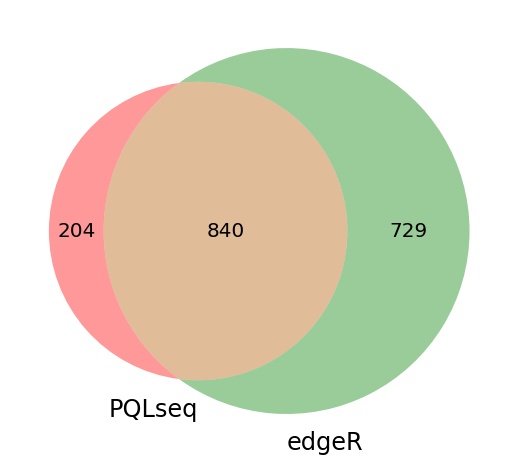

In [11]:
v = venn2((pql_genes, edger_genes), ('PQLseq', 'edgeR'))

plt.savefig('venn.pdf', dpi=300)